In [1]:
!pip install -U scikit-fuzzy

     ---------------------------------------- 0.0/994.0 kB ? eta -:--:--
     ---- --------------------------------- 112.6/994.0 kB 3.3 MB/s eta 0:00:01
     ---------- --------------------------- 276.5/994.0 kB 2.8 MB/s eta 0:00:01
     ----------------------- -------------- 604.2/994.0 kB 3.8 MB/s eta 0:00:01
     -------------------------------- ----- 839.7/994.0 kB 3.8 MB/s eta 0:00:01
     -------------------------------------- 994.0/994.0 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894084 sha256=c2f228214b00179aefcee498e9600be1e26629f8c2f442a57779a3da2cf2bac7
  Stored in directory: c:\users\mehra\appdata\local\pip\cache\wheels\b1\67\d1\6c29aeb1cd2d36447ad5b0de027580b8894aff702a9b50041e
Successfully built scikit-fuzzy


Automation Level: 50.0


C:\Users\mehra\anaconda3\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


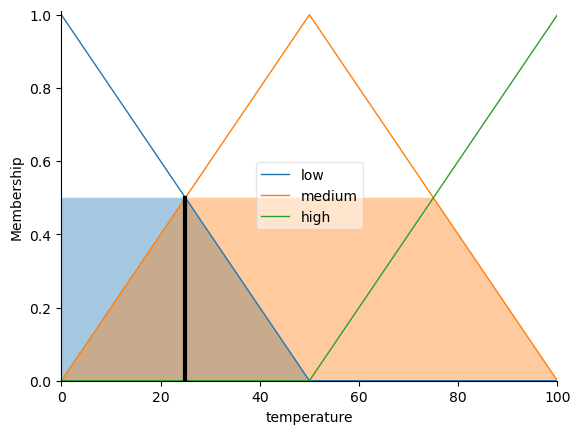

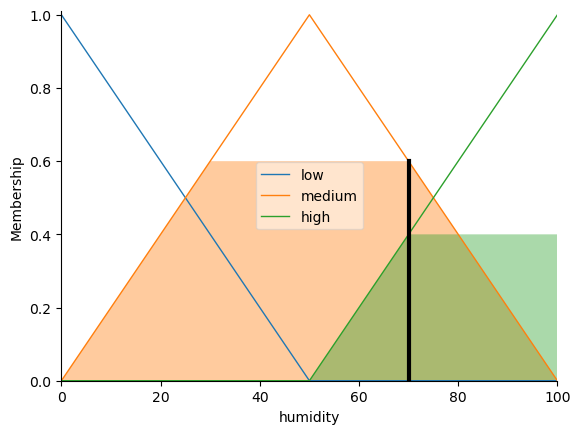

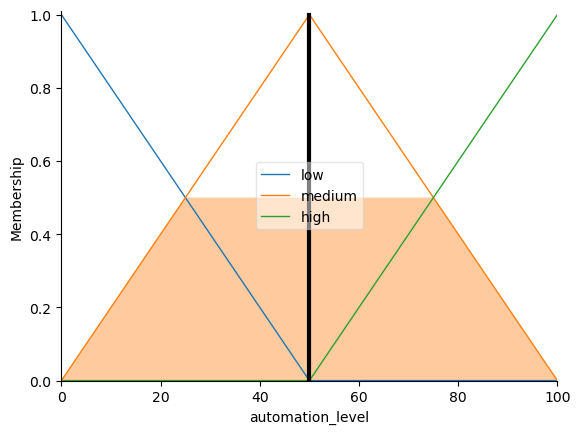

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# input variables
temperature = ctrl.Antecedent(np.arange(0, 101, 1), 'temperature')
humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'humidity')

# output variable
automation_level = ctrl.Consequent(np.arange(0, 101, 1), 'automation_level')

# fuzzy sets for input variables
temperature['low'] = fuzz.trimf(temperature.universe, [0, 0, 50])
temperature['medium'] = fuzz.trimf(temperature.universe, [0, 50, 100])
temperature['high'] = fuzz.trimf(temperature.universe, [50, 100, 100])

humidity['low'] = fuzz.trimf(humidity.universe, [0, 0, 50])
humidity['medium'] = fuzz.trimf(humidity.universe, [0, 50, 100])
humidity['high'] = fuzz.trimf(humidity.universe, [50, 100, 100])

# fuzzy sets for output variable
automation_level['low'] = fuzz.trimf(automation_level.universe, [0, 0, 50])
automation_level['medium'] = fuzz.trimf(automation_level.universe, [0, 50, 100])
automation_level['high'] = fuzz.trimf(automation_level.universe, [50, 100, 100])

#  fuzzy rules
rule1 = ctrl.Rule(temperature['low'] & humidity['low'], automation_level['low'])
rule2 = ctrl.Rule(temperature['medium'] & humidity['medium'], automation_level['medium'])
rule3 = ctrl.Rule(temperature['high'] & humidity['high'], automation_level['high'])

# Create control system
automation_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

# Create simulation
automation_sim = ctrl.ControlSystemSimulation(automation_ctrl)

# Set input values
automation_sim.input['temperature'] = 25  # We can replace with actual temperature value
automation_sim.input['humidity'] = 70  # We can replace with actual humidity value

# Compute the automation level
automation_sim.compute()

# Access the defuzzified results
# Printing the automation level
print("Automation Level:", automation_sim.output['automation_level'])

temperature.view(sim=automation_sim)
humidity.view(sim=automation_sim)
automation_level.view(sim=automation_sim)

